This notebook covers distplot, pie chart, scatterplot, wordcloud, and passiveAgressiveRegressor

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv", encoding='latin1')

In [5]:
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0        56.0   98.0   
1       5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2       4021.0     2085.0         1188.0           0.0       533.0   41.0   
3       4528.0     2700.0          621.0         932.0        73.0  172.0   
4       2518.0     1704.0          255.0         279.0        37.0   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0       9.0     5.0  162.0            35.0      2.0   
1       7.0    14.0  224.0            48.0     10.0   
2      11.0     1.0  131.0            62.0     12.0   
3      10.0     7.0  213.0            23.0      8.0   
4       5.0     4.0  123.0             8.0      0.0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [8]:
data = df.dropna()

### Analyzing Instgram Reach

The distribution of impressions received from home:

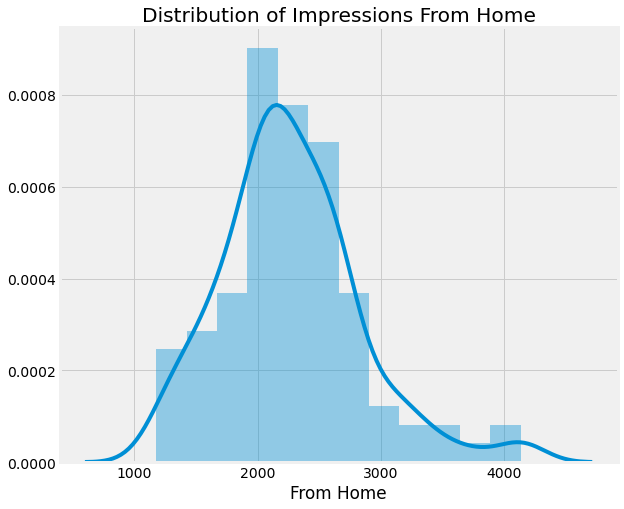

In [9]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

It's hard to reach all the follwers daily.

The distribution of the impressions received from hashtags:

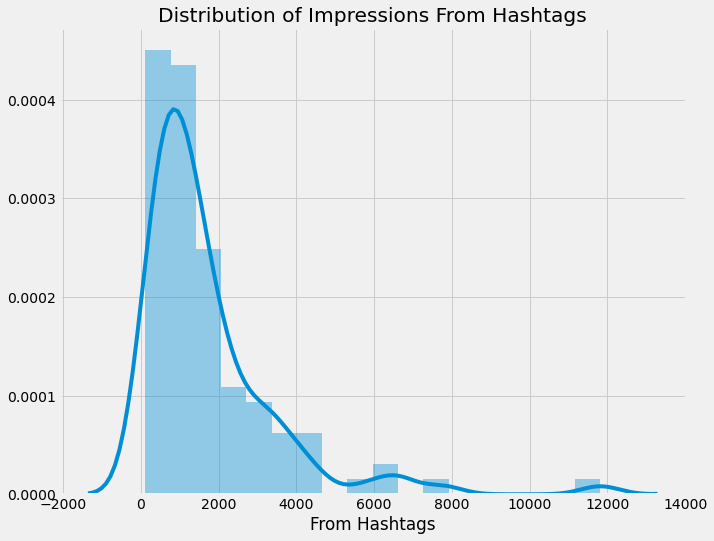

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Not all posts can be reached using hashtags, but many new users can be reached from hashtags.

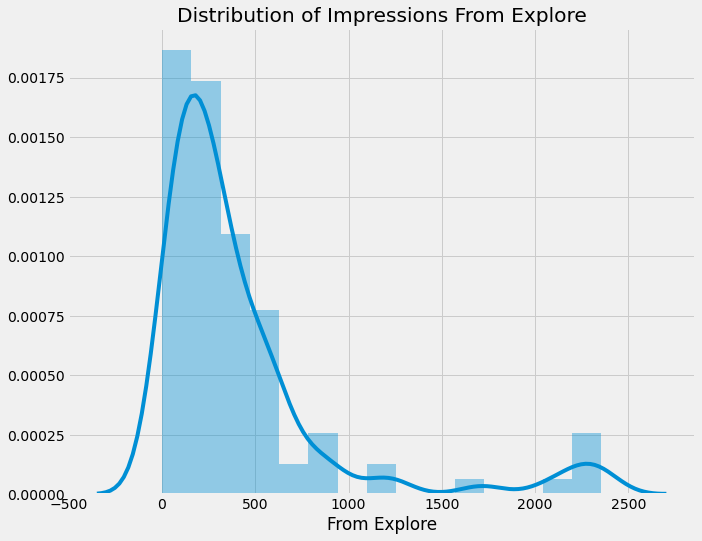

In [14]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

The explore section if the recommendation system of instgram. It recommends posts to the users based on their preferences and interests. By looking at the chart, Instgram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it's still very low compared to the reach received from hashtags.

### Percentage of impressions from various sources on Instagram

In [15]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

In [17]:
fig = px.pie(data, values = values, 
             names = labels, 
             title = "Impressions on Instagram Posts From Various Sources",
            hole = 0.5)
fig.show()

## Analyzing Content

### Caption

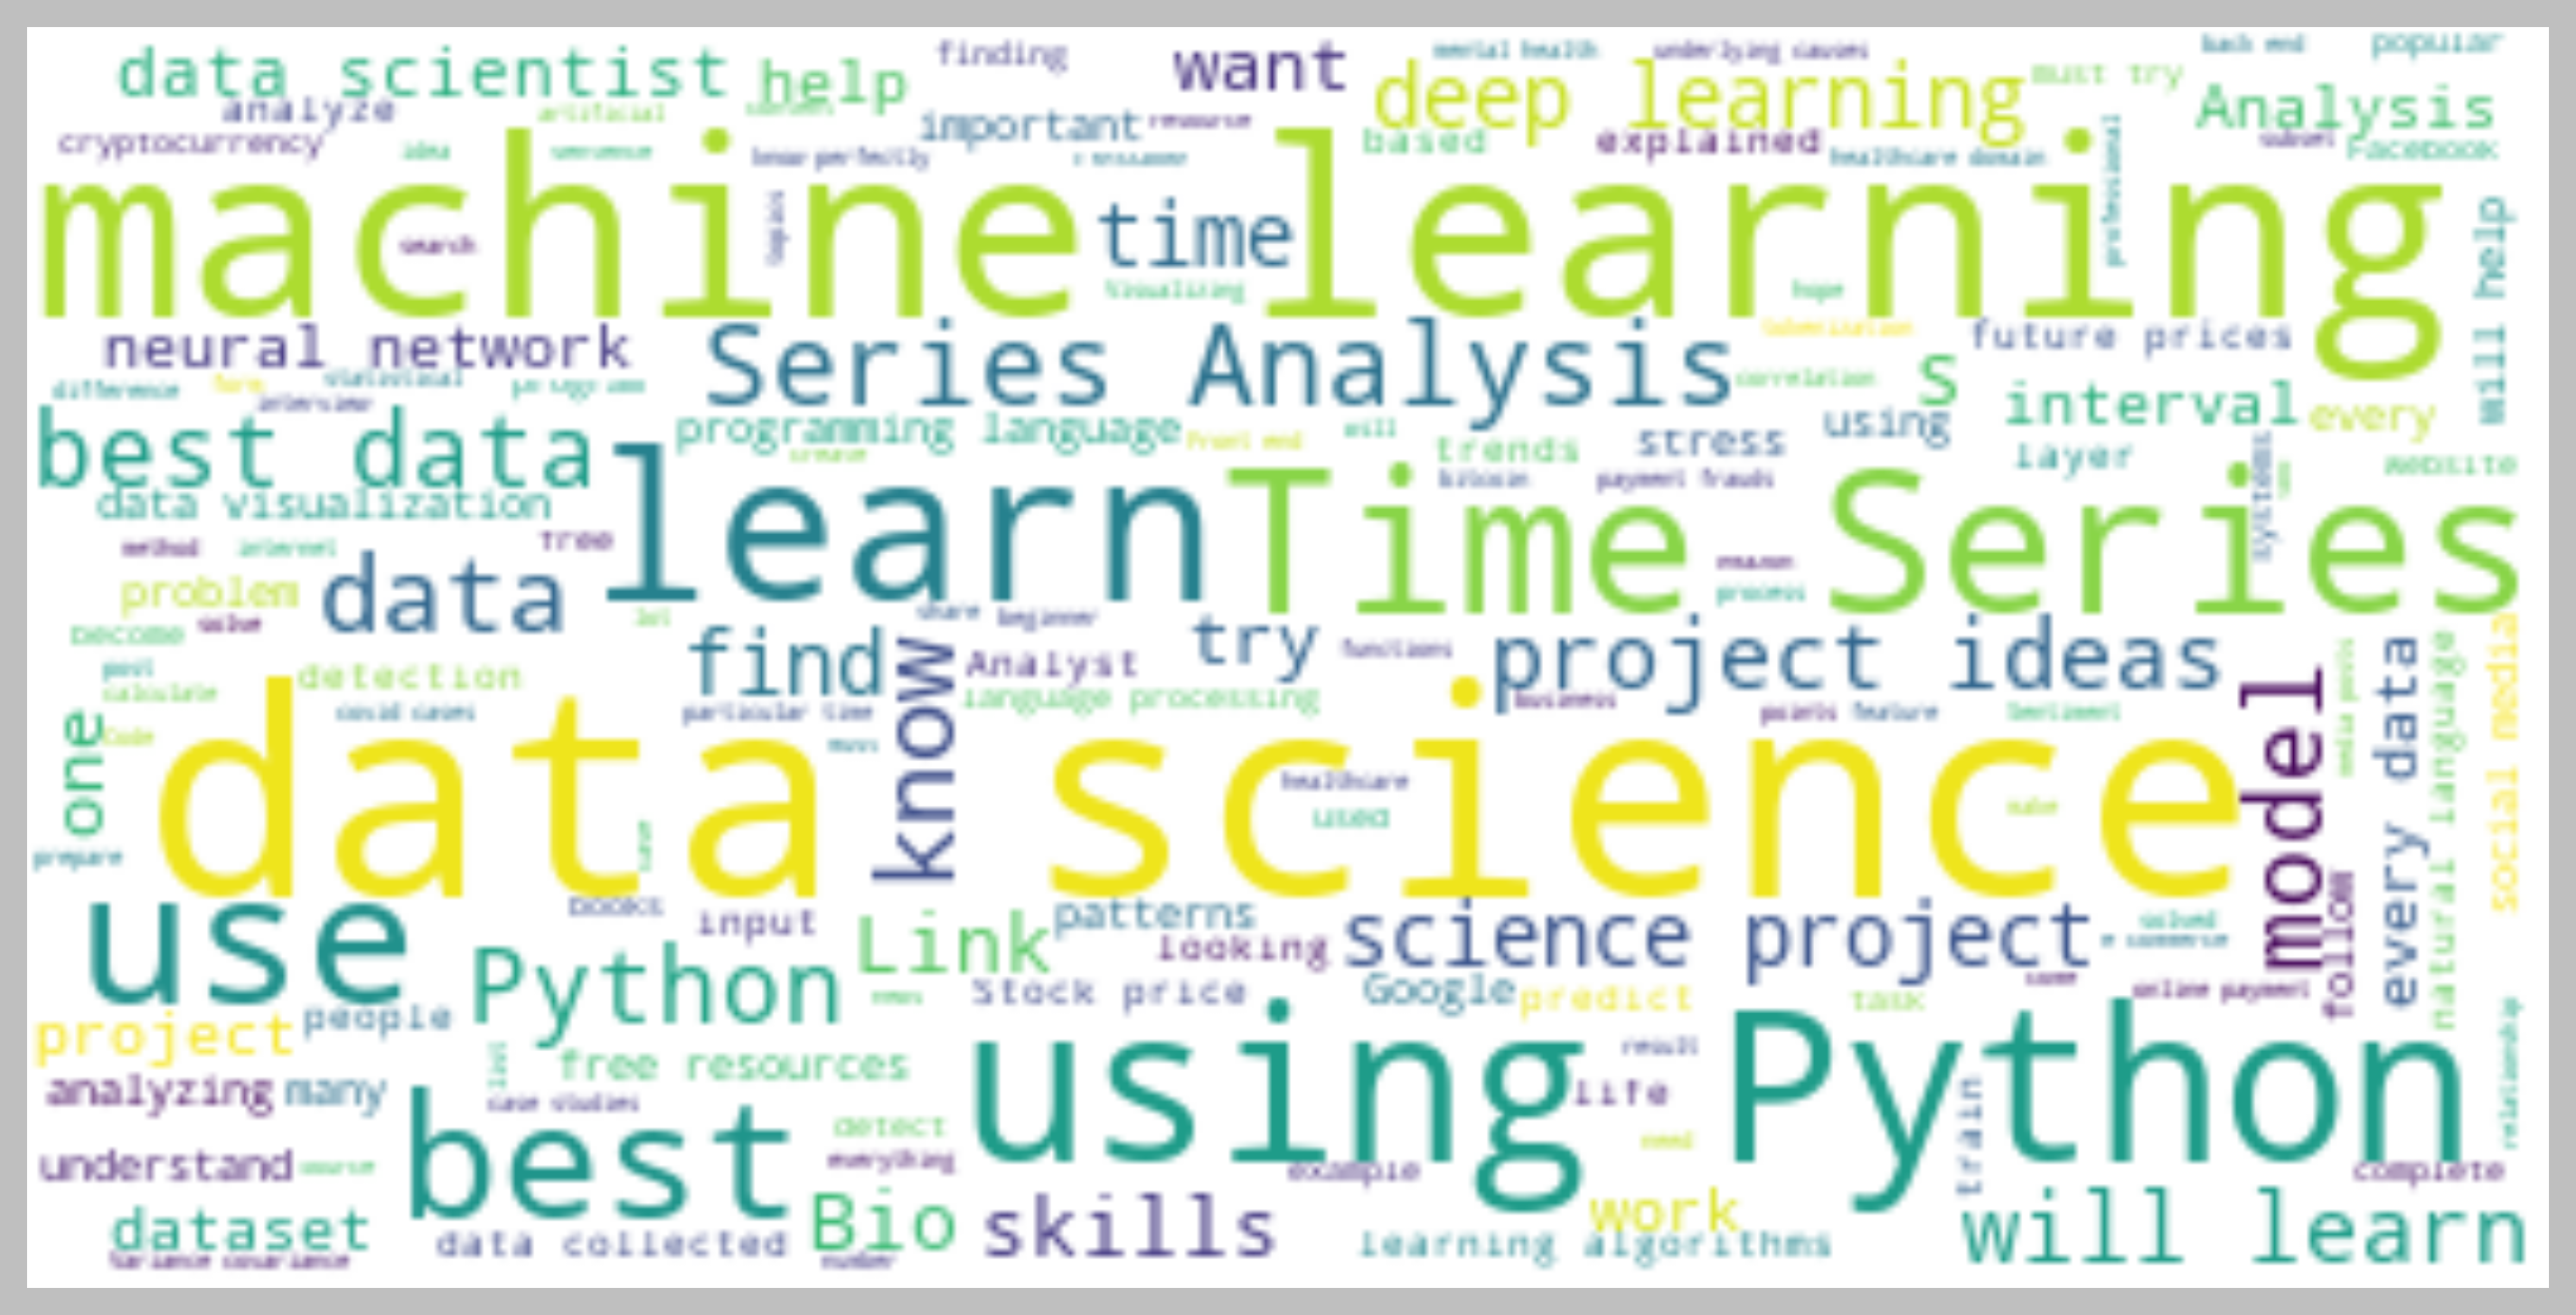

In [41]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Hashtag

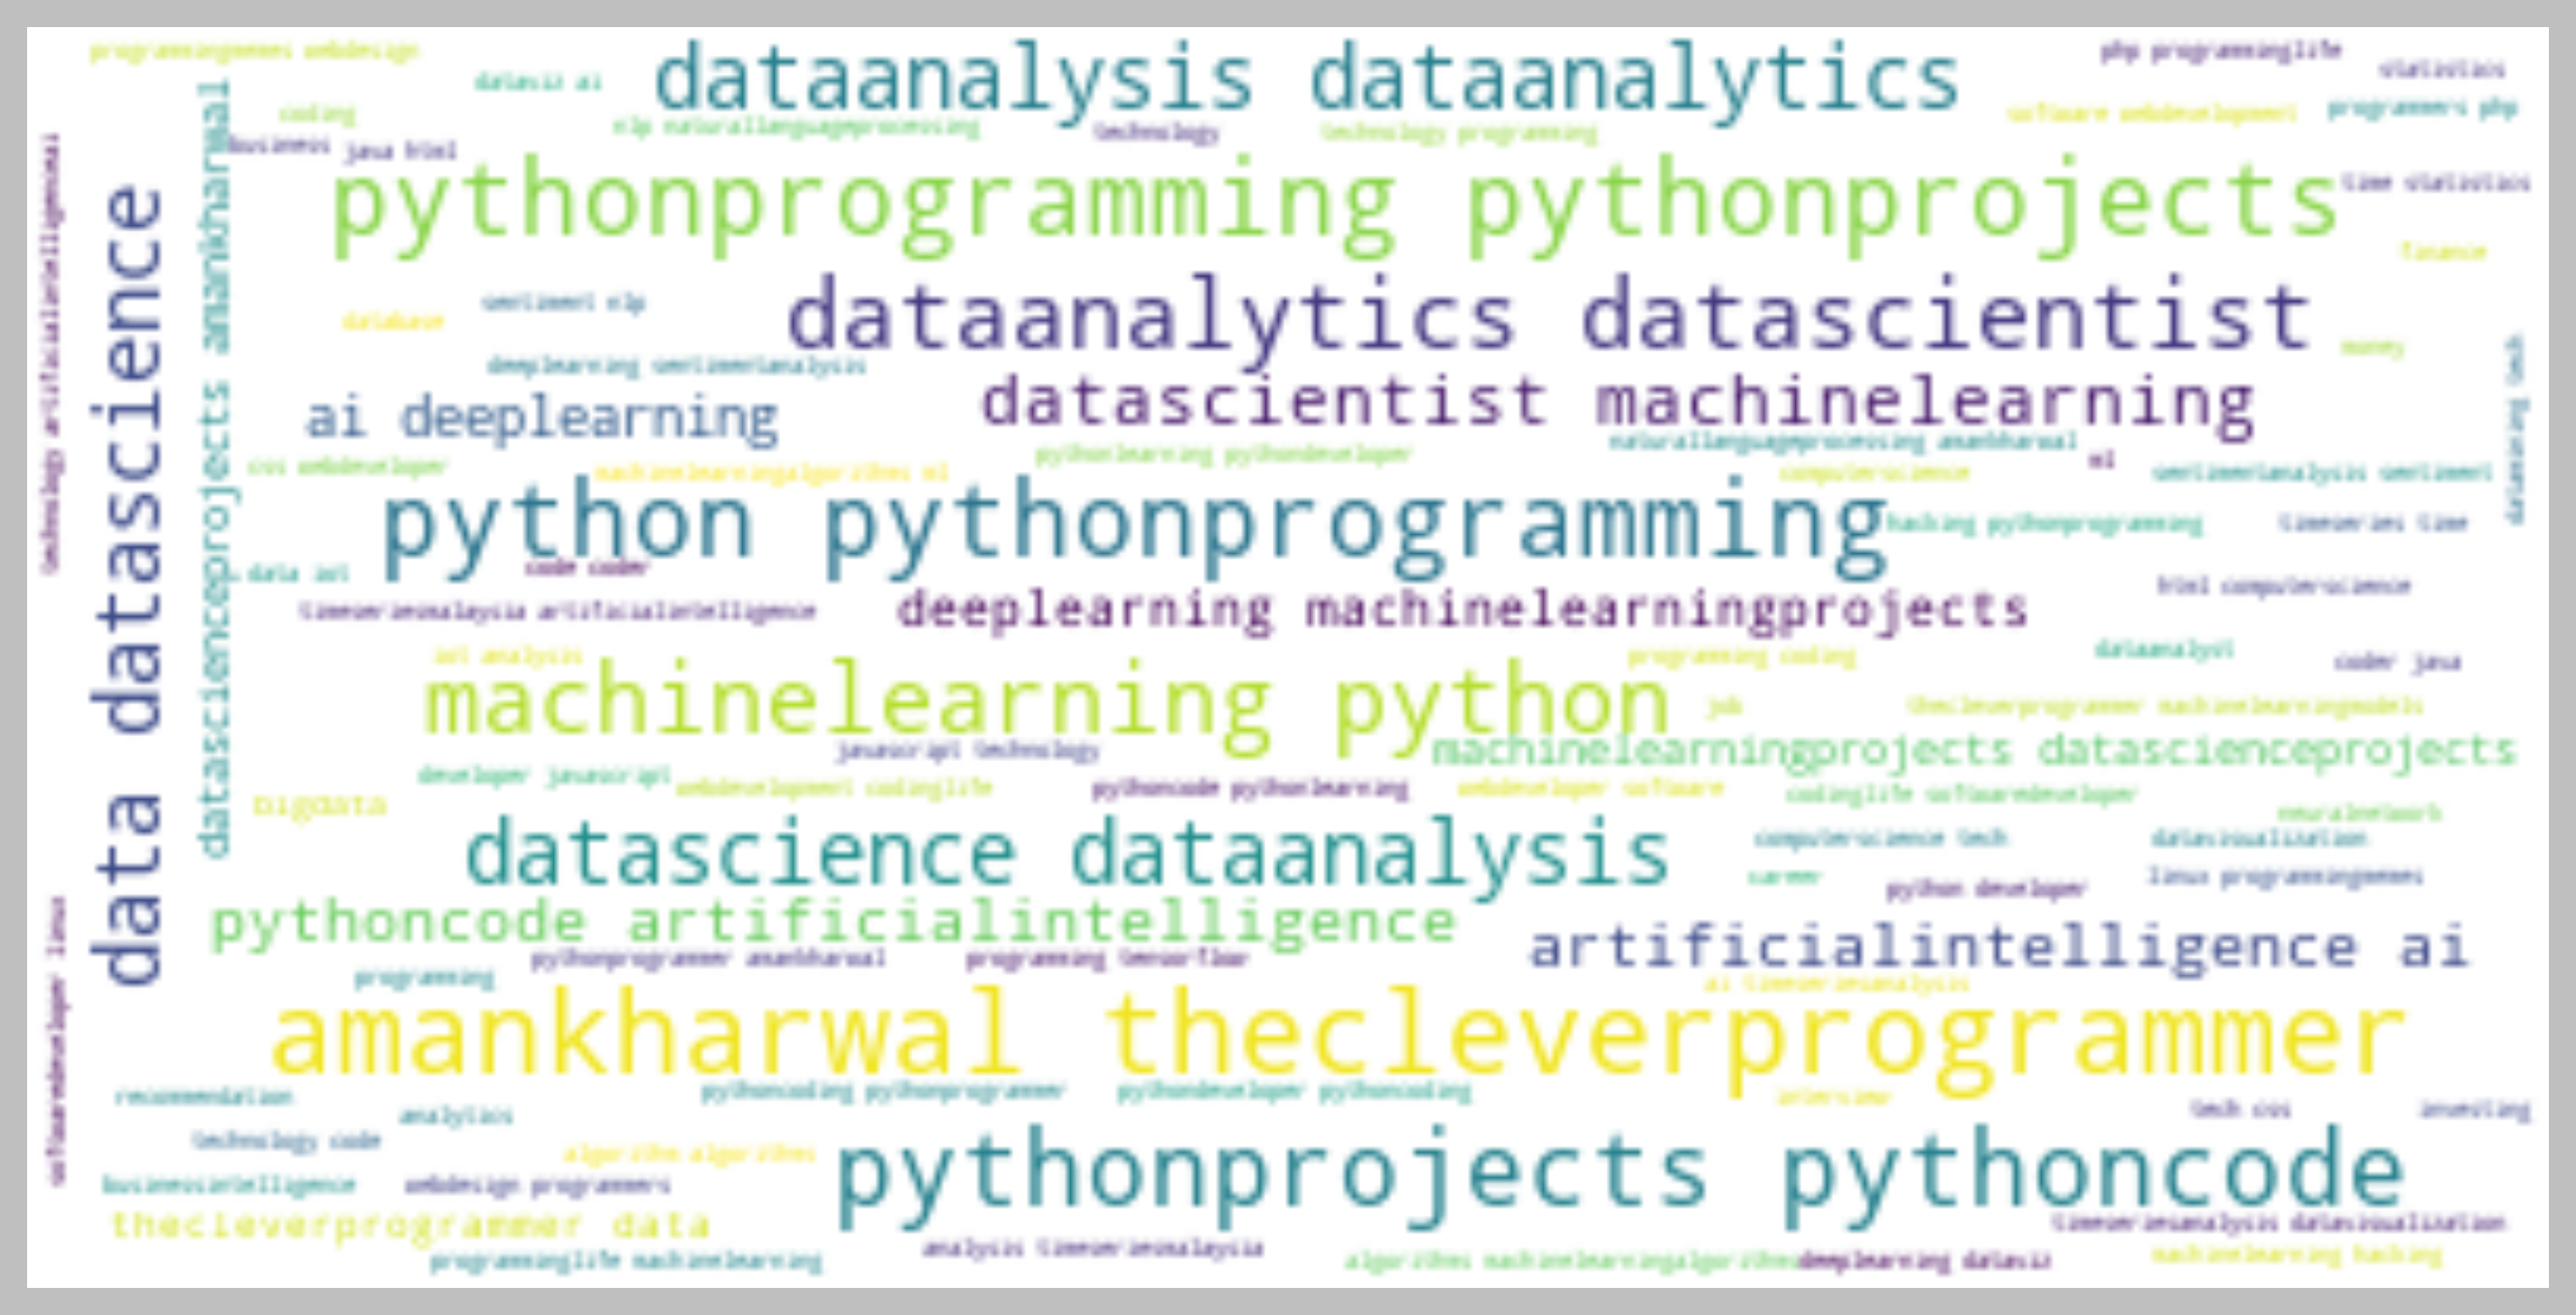

In [42]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Analyzing Relationships

In [43]:
figure = px.scatter(data_frame=data, x="Impressions", y="Likes", size="Likes", trendline="ols",
                   title="Relationship Between Likes and Impressions")
figure.show()

There is a linear relationship between the number of likes and the reach I got on Instagram. Now let’s see the relationship between the number of comments and the number of impressions on my Instagram posts:

In [44]:
figure = px.scatter(data_frame=data, x="Impressions", y="Comments", size="Comments", trendline="ols",
                   title="Relationship Between Comments and Total Impressions")
figure.show()

It looks like the number of comments we get on a post doesn’t affect its reach. Now let’s have a look at the relationship between the number of shares and the number of impressions:

In [45]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do. Now let’s have a look at the relationship between the number of saves and the number of impressions:

In [46]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

There is a linear relationship between the number of times my post is saved and the reach of my Instagram post. Now let’s have a look at the correlation of all the columns with the Impressions column:

In [49]:
correlation = data.corr()
print(correlation['Impressions'].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


So we can say that more likes and saves will help you get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

## Analyzing Conversion Rate

In [51]:
conversion_rate = (data['Follows'].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


So the conversation rate of my Instagram account is 31% which sounds like a very good conversation rate. Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

In [52]:
figure = px.scatter(data_frame=data, x="Profile Visits", y="Follows", size="Follows", trendline="ols",
                   title="Relationship Between Profile Visits and Followers Gained")
figure.show()

The relationship between profile visits and followers gained is also linear.

## Instagram Reach Prediction Model

In [53]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9470576364686423

In [54]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10185.34671109])